In [1]:
import numpy as np
X_train = np.load("reshaped_14.npy")

In [15]:
hidden_nodes = 225
epochs = 10
lr = 1e-4
input_size = 196
X = X_train.reshape(60000,input_size)
samples = 60000
Lambda = 1
s = 0.5
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return (np.matmul(W.T,x.reshape(len(x),1)) + b)

def diff_KL(s,Zm,Zd,Zdb):
    temp = np.multiply((np.multiply(-s,1/Z)+np.multiply(1-s,1/(1-Z))),Zd/N)
    temp1 = np.multiply((np.multiply(-s,1/Z)+np.multiply(1-s,1/(1-Z))),Zdb/N)
    return (temp,temp1)

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(hidden_nodes,1))
W2 = np.random.normal(0,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(0,1,(input_size,1))

In [16]:
for i in range(epochs):
    loss = 0
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    S  = np.zeros(W1.shape)
    Zm = Zd = Zdb = 0
    ZmM = np.zeros(W1.shape)
    for j in range(samples):
        #forward path
        out1 = layer(X[j],W1,Bi1)
        z = sigm(out1)
        out2 = layer(z,W2,Bi2)
        y = sigm(out2)
        
        #Sparsity Condition variables preperation
        Zd  += np.matmul(diff_sigm(out1),X[j].reshape(1,input_size))
        Zdb += diff_sigm(out1)
        Zm  += z/samples
        # Backprop
        temp = 2*(y-X[j].reshape(np.shape(y)))*diff_sigm(out2)
        b2 += temp
        w2 += np.matmul(z,temp.T)
        loss += np.linalg.norm(y-X[j])**2
        b1 += np.matmul(np.multiply(diff_sigm(out1),W2),temp)
        w1 += np.matmul(X[j].reshape(input_size,1),b1.T)
    print(loss)
    for i in range(input_size):
        S[i] = np.random.binomial(1,s,np.shape(b1))
        ZmM[i] = np.random.binomial(1,Zm,np.shape(b1))
    
    sv = np.random.binomial(1,s_bern,np.shape(b1))
    (KL_B,KL_W) = diff_KL(S,Zm,Zd,Zdb,samples,b1)
    W1 -= lr*(w1 + Lambda*(KL_W))
    W2 -= lr*w2
    Bi1 -= lr*(b1 + Lambda*(KL_B))
    Bi2 -= lr*b2


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


14260649075180.316


ValueError: size is not compatible with inputs

In [35]:
import matplotlib.pyplot as plt

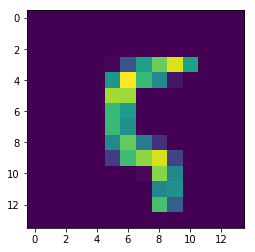

In [36]:
plt.imshow(X_train[100])

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


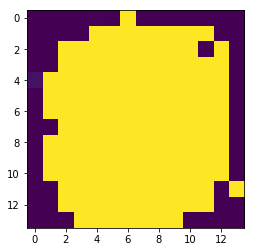

In [37]:
out1 = layer(X[j],W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y = sigm(out2)
y = y.reshape(14,14)
plt.imshow(y)